# Amazon Customer Review

* Source
    * [Build 10 Practical Projects and Advance Your Skills in Machine Learning Using Python and Scikit Learn](https://nlbsg.udemy.com/course/machine-learning-classification/learn/)
* Data
    * Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products
* Objective
    * Discover insights into consumer reviews
    * Perform sentiment analysis on the data

## Process

* [Import Source Data](#import-source-data)
* [EDA](#eda)
    * [Feature Distribution](#feature-distribution)
    * [Ratings Per Variation](#ratings-per-variation)
    * [Feedback - Rating Corrrelation](#feedback---rating-corrrelation)
* [Data Cleaning](#data-cleaning)
* [Feature Engineering](#feature-engineering)
    * [One Hot Encoding Categorical Features](#one-hot-encoding-categorical-features)
    * [Text Vectorization](#text-vectorization)
* [Data Pre-Processing](#data-pre-processing)
    * [Train Test Split](#train-test-split)
    * [Feature Normalization](#feature-normalization)
* [Model Building](#model-building)
    * [Train](#train)
    * [Predict](#predict)
    * [Evaluate](#evaluate)
    * [Improvement](#improvement)

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Source Data

In [201]:
dataset = pd.read_csv('./dataset/amazon_alexa.tsv', sep='\t')

## EDA

In [202]:
pd.set_option('display.max_colwidth', 100)
dataset.head(10)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wr...",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the light...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed another Bluetooth or something to play music easily acce...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see tha...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'm working on getting one in every room of my house...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,"Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, inform...",1


In [203]:
dataset.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [204]:
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### Feature Distribution

/var/folders/dx/spp2spg10dv8rnxn53dlhmx40000gn/T/ipykernel_53125/2388303994.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


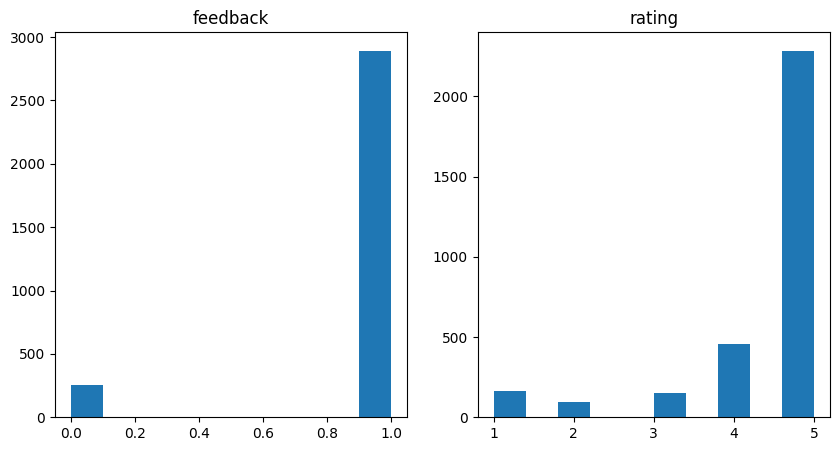

In [205]:
plt.figure(figsize=(10, 5))
plt.title("Feature Distribution")

column_names = ['feedback', 'rating']
for i in range(len(column_names)):
    plt.subplot(1, 2, i+1)
    f = plt.gca()
    f.set_title(column_names[i])
    plt.hist(dataset[column_names[i]])

plt.show()


### Ratings Per Variation

In [206]:
variation_rating = dataset.groupby(['variation']) \
    .agg({'rating': ['mean']}) \
    .reset_index()

variation_rating.columns = ['variation', 'mean_rating']


<BarContainer object of 16 artists>

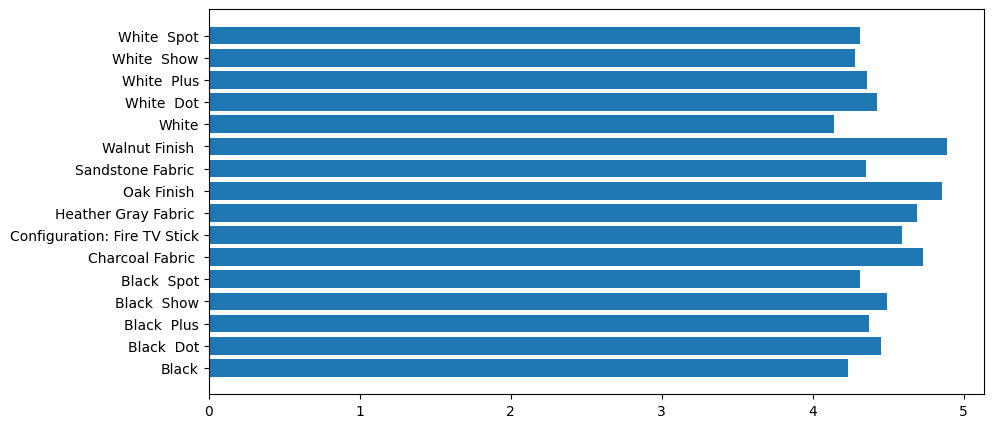

In [207]:
plt.figure(figsize = (10, 5))
plt.barh(variation_rating['variation'], variation_rating['mean_rating'])

### Feedback - Rating Corrrelation

In [208]:
dataset[['feedback', 'rating']].corr()

,feedback,rating
feedback,1.000000,0.861968
rating,0.861968,1.000000


In [209]:
dataset[['feedback', 'rating']].groupby(['feedback']) \
    .agg({'rating': ['unique']}) \
    .head()

,rating
,unique
feedback,
0,"[2, 1]"
1,"[5, 4, 3]"


## Data Cleaning

* Don't need `date`
* Focus on binary `feedback`, can drop `rating`

In [210]:
dataset = dataset.drop(['date', 'rating'], axis=1)

In [211]:
dataset.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wr...",1
3,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the light...",1
4,Charcoal Fabric,Music,1


In [212]:
dataset.shape

(3150, 3)

## Feature Engineering

### One Hot Encoding Categorical Features

In [213]:
variation_dummies = pd.get_dummies(dataset['variation'], drop_first=True)
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [214]:
dataset.drop('variation', axis=1, inplace=True)

In [215]:
dataset = pd.concat([dataset, variation_dummies], axis=1)
dataset.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wr...",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the light...",1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [216]:
dataset.dropna(inplace=True)

### Text Vectorization

In [217]:
from sklearn.feature_extraction.text import CountVectorizer

In [218]:
vectorizer = CountVectorizer()
count_vectorizer = vectorizer.fit_transform(dataset['verified_reviews'])

In [219]:
print(vectorizer.get_feature_names_out())
print(vectorizer.get_feature_names_out().shape)
print(vectorizer.get_feature_names_out()[:100])


['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']
(4044,)
['00' '000' '07' '10' '100' '100x' '11' '1100sf' '12' '129' '12am' '15'
 '150' '18' '19' '1964' '1990' '1gb' '1rst' '1st' '20' '200' '2000' '2017'
 '229' '23' '24' '25' '29' '2nd' '2package' '30' '300' '30pm' '34' '360'
 '39' '3rd' '3x' '3xs' '40' '45' '48' '4am' '4ghz' '4k' '4th' '50' '54'
 '5am' '5ghz' '5th' '600' '62' '672' '6th' '70' '75' '79' '80' '80s' '81'
 '83' '85' '88' '888' '8gb' '90' '91' '911' '99' '_specifically_' 'a1'
 'a19' 'abay' 'abc' 'abd' 'abilities' 'ability' 'able' 'abode' 'about'
 'above' 'absolutely' 'absolutly' 'ac' 'accent' 'acceptable' 'accepting'
 'access' 'accessable' 'accessible' 'accessing' 'accessories' 'accesss'
 'accident' 'accidentally' 'accompanying' 'accomplish' 'accomplished']


In [220]:
count_vectorizer.shape

(3149, 4044)

In [221]:
encoded_reviews = pd.DataFrame(count_vectorizer.toarray())
encoded_reviews.columns = encoded_reviews.columns.astype(str)
encoded_reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
dataset.drop('verified_reviews', axis=1, inplace=True)
dataset = pd.concat([dataset, encoded_reviews], axis=1)
dataset.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1.0,False,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,False,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,False,False,False,False,True,False,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,False,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
dataset.isna().any()

feedback       True
Black  Dot     True
Black  Plus    True
Black  Show    True
Black  Spot    True
               ... 
4039           True
4040           True
4041           True
4042           True
4043           True
Length: 4060, dtype: bool

In [224]:
dataset.dropna(inplace=True)
dataset.shape

(3148, 4060)

## Data Pre-Processing

### Train Test Split

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
label = dataset['feedback']
dataset.drop('feedback', axis=1, inplace=True)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset,
    label,
    test_size=0.2,
    random_state=0)

In [228]:
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (2518, 4059)
X_test.shape: (630, 4059)
y_train.shape: (2518,)
y_test.shape: (630,)


### Feature Normalization

In [229]:
X_train.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
2918,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794,False,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1319,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2034,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No need to further normalize.

## Model Building

### Train

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
# n_estimators -- num of trees
random_forest_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

In [232]:
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

### Predict

In [236]:
y_predict_train = random_forest_classifier.predict(X_train)
y_predict_test = random_forest_classifier.predict(X_test)

### Evaluate

In [140]:
from sklearn.metrics import confusion_matrix, classification_report

In [237]:
cm_train = confusion_matrix(y_train, y_predict_train)
cm_test = confusion_matrix(y_test, y_predict_test)

<Axes: >

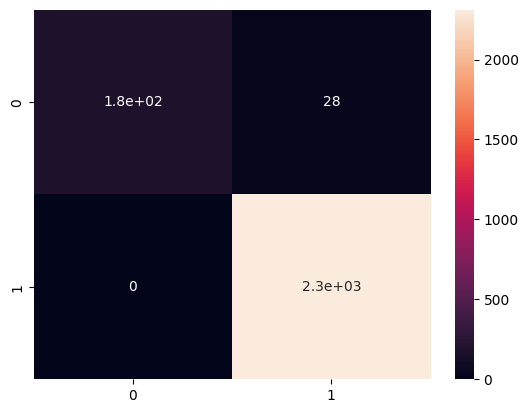

In [243]:
sns.heatmap(cm_train, annot=True)

<Axes: >

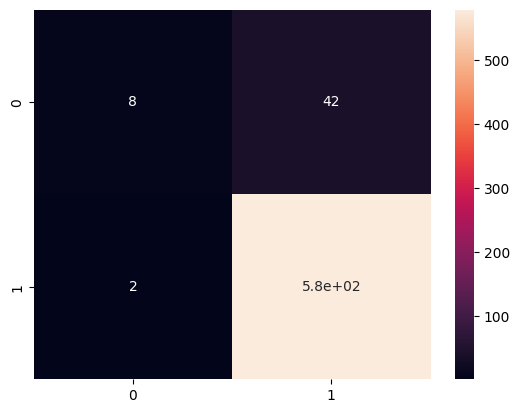

In [244]:
sns.heatmap(cm_test, annot=True)

In [246]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93       206
         1.0       0.99      1.00      0.99      2312

    accuracy                           0.99      2518
   macro avg       0.99      0.93      0.96      2518
weighted avg       0.99      0.99      0.99      2518



In [247]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.80      0.16      0.27        50
         1.0       0.93      1.00      0.96       580

    accuracy                           0.93       630
   macro avg       0.87      0.58      0.61       630
weighted avg       0.92      0.93      0.91       630

